In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
df = pd.read_csv("/content/water_potability.csv")

In [36]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [39]:
df.columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [40]:
df.shape

(3276, 10)

In [41]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


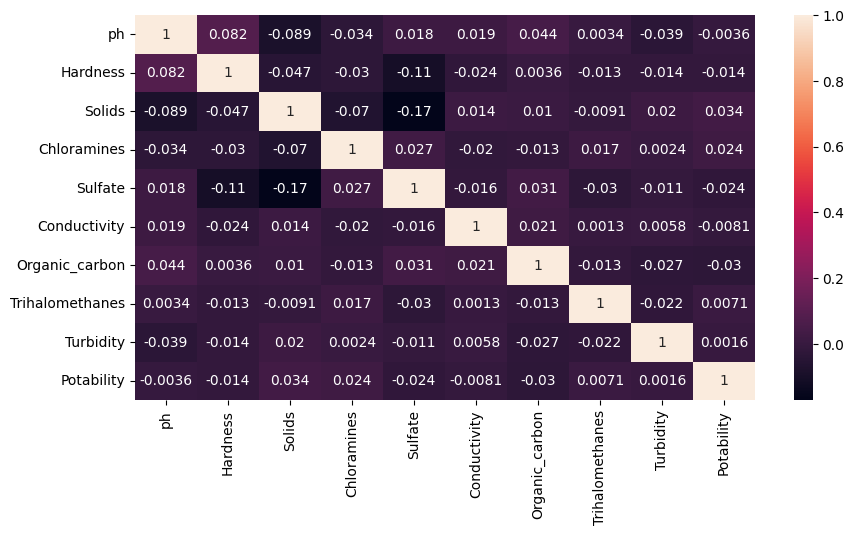

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

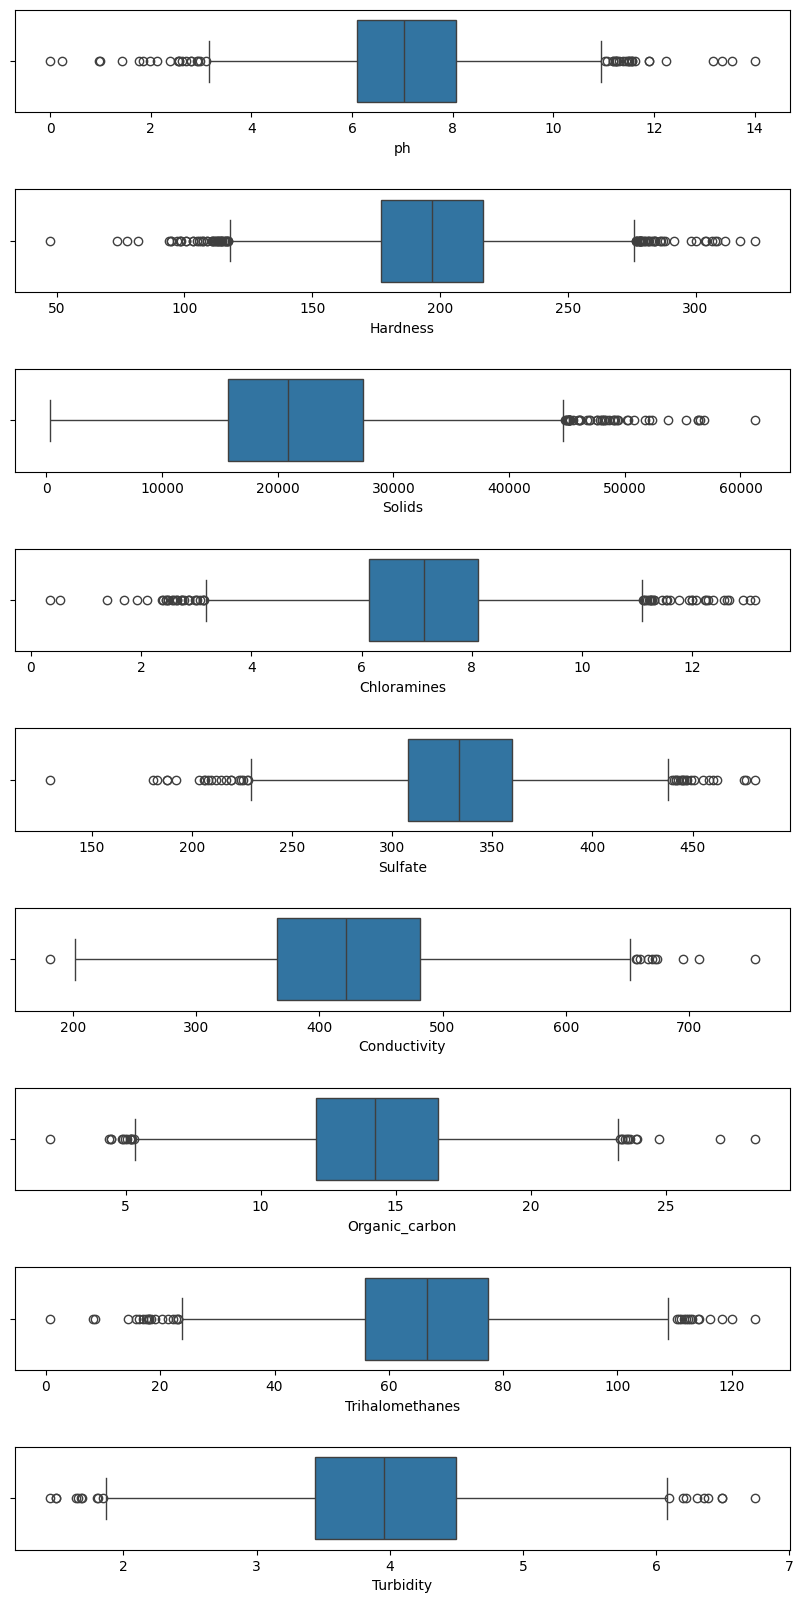

In [43]:
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
columns_name = df.columns

for ax, column in zip(axes, columns_name[:9]):
    sns.boxplot(x=column, data=df, ax=ax)

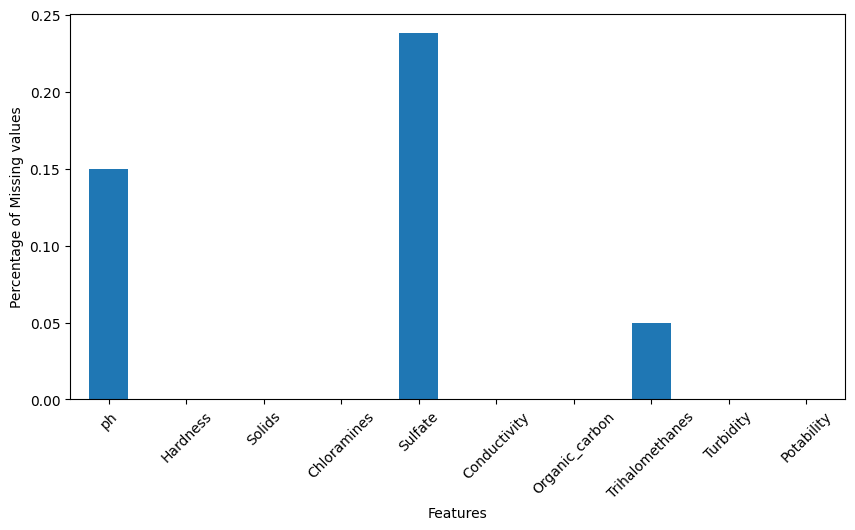

In [44]:
df.isnull().mean().plot.bar(figsize=(10,5))
plt.xlabel("Features")
plt.ylabel("Percentage of Missing values")
plt.xticks(rotation=45)
plt.show()

In [45]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [46]:
X.shape, y.shape

((3276, 9), (3276,))

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
pred_dt = dt_model.predict(X_test)

In [52]:
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_dt*100

63.87195121951219

In [53]:
cm_dt = confusion_matrix(y_test, pred_dt)
cm_dt

array([[370,  42],
       [195,  49]])

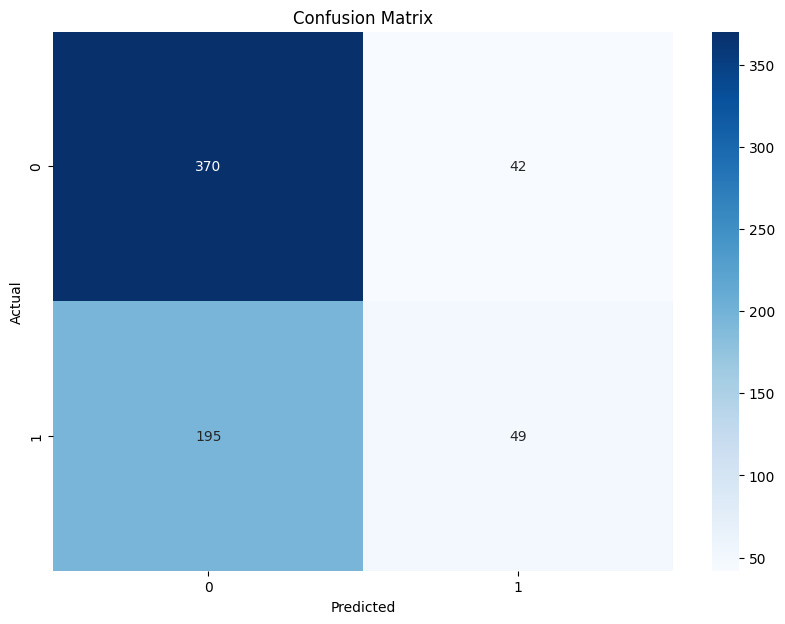

In [54]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [56]:
# Load dataset
data = pd.read_csv("/content/water_potability.csv")  # Ensure you replace this with the actual file path

In [57]:
# Handling missing values
data = data.dropna()

In [58]:
# Splitting features and target variable
X = data.drop(columns=["Potability"])
y = data["Potability"]

In [59]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Training logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Making predictions
y_pred = model.predict(X_test)


In [63]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [64]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.5955
Confusion Matrix:
[[239   1]
 [162   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       240
           1       0.50      0.01      0.01       163

    accuracy                           0.60       403
   macro avg       0.55      0.50      0.38       403
weighted avg       0.56      0.60      0.45       403



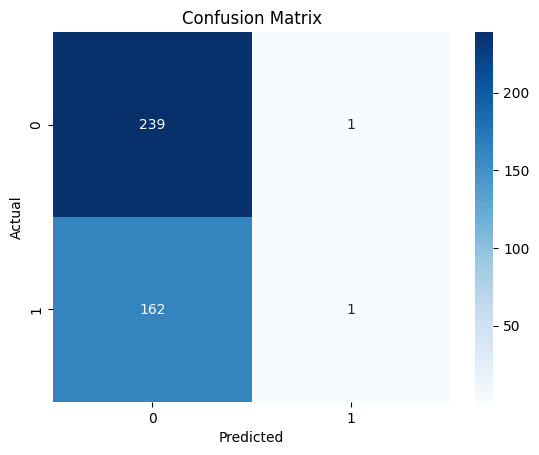

In [65]:
# Visualization of confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
